In [35]:
from os import environ
environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
housing = fetch_california_housing()
X_train_full, X_test, Y_train_full, Y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_full, Y_train_full)

scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [37]:
input_A = keras.layers.Input(shape=[5],name='wide_input')
input_B = keras.layers.Input(shape=[6],name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1,name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [38]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         (None, 6)            0                                            
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         (None, 5)            0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           930         dense_9[0][0]                    
__________________________________________________________________________________________________
concatenat

In [39]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [40]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [42]:
history = model.fit([X_train_A, X_train_B], Y_train, epochs=20, validation_data=([X_valid_A,X_valid_B], Y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 176us/step - loss: 1.8469 - val_loss: 0.8256
Epoch 2/20
11610/11610 [==============================] - 1s 103us/step - loss: 0.7433 - val_loss: 0.7283
Epoch 3/20
11610/11610 [==============================] - 1s 99us/step - loss: 0.6625 - val_loss: 0.6792
Epoch 4/20
11610/11610 [==============================] - 1s 99us/step - loss: 0.6246 - val_loss: 0.6465
Epoch 5/20
11610/11610 [==============================] - 1s 102us/step - loss: 0.5983 - val_loss: 0.6208
Epoch 6/20
11610/11610 [==============================] - 1s 100us/step - loss: 0.5774 - val_loss: 0.6016
Epoch 7/20
11610/11610 [==============================] - 1s 99us/step - loss: 0.5616 - val_loss: 0.5862
Epoch 8/20
11610/11610 [==============================] - 1s 100us/step - loss: 0.5485 - val_loss: 0.5737
Epoch 9/20
11610/11610 [==============================] - 1s 99us/step - loss: 0.5389 - val_loss: 0.5640
E

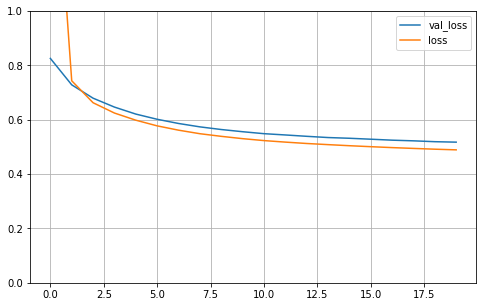

In [43]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [46]:
mse_test = model.evaluate([X_test_A, X_test_B], Y_test)
mse_test

5160/5160 [==============================] - 0s 57us/step


0.4932162937498832

In [47]:
Y_pred = model.predict([X_new_A, X_new_B])
Y_pred

array([[4.8840976],
       [1.2940096],
       [2.3001335]], dtype=float32)